<a href="https://www.kaggle.com/code/shanushah14/market-basket-analysis-using-pyhton?scriptVersionId=218630892" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 Market Basket Analysis is a data-driven technique used to uncover patterns and relationships within large transactional datasets, particularly in retail and e-commerce. It helps businesses understand which products or items are often purchased together, providing insights for optimizing product placement, marketing strategies, and promotions.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/market-basket-dataset/market_basket_dataset.csv


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("/kaggle/input/market-basket-dataset/market_basket_dataset.csv")

In [5]:
data.shape

(500, 5)

In [6]:
data.head()

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255


In [7]:
data.dtypes

BillNo          int64
Itemname       object
Quantity        int64
Price         float64
CustomerID      int64
dtype: object

## Let’s have a look if the data has any null values or not before moving forward:

In [8]:
data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64

## Now, let’s have a look at the summary statistics of this dataset:

In [9]:
data.describe()

,BillNo,Quantity,Price,CustomerID
count,500.000000,500.000000,500.000000,500.000000
mean,1247.442000,2.978000,5.617660,54229.800000
std,144.483097,1.426038,2.572919,25672.122585
min,1000.000000,1.000000,1.040000,10504.000000
25%,1120.000000,2.000000,3.570000,32823.500000
50%,1246.500000,3.000000,5.430000,53506.500000
75%,1370.000000,4.000000,7.920000,76644.250000
max,1497.000000,5.000000,9.940000,99162.000000


In [10]:
data['Itemname'].unique()

array(['Apples', 'Butter', 'Eggs', 'Potatoes', 'Oranges', 'Milk',
       'Onions', 'Cereal', 'Tomatoes', 'Bananas', 'Pasta', 'Bread',
       'Coffee', 'Sugar', 'Chicken', 'Cheese', 'Tea', 'Yogurt', 'Juice'],
      dtype=object)

## Now, let’s have a look at the sales distribution of items:

In [11]:
fig = px.histogram(data, x='Itemname',title='Item Distribution')
fig.show()


Same Visualisation in Seaborn and Matplotlib

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



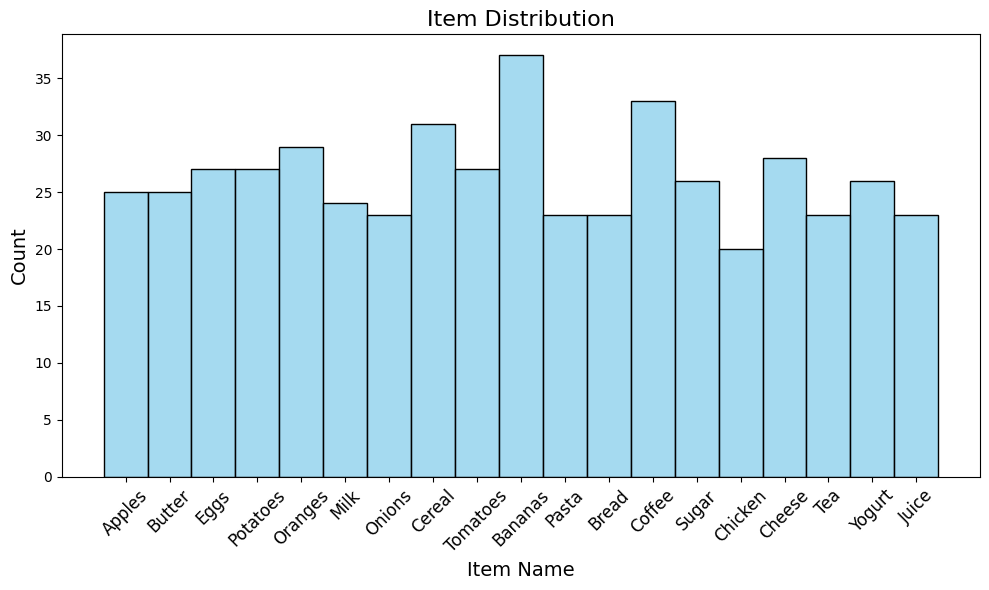

In [12]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Itemname', color='skyblue')

# Customize and show the plot
plt.title('Item Distribution', fontsize=16)
plt.xlabel('Item Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

## Now, let’s have a look at the top 10 most popular items sold by the store:

In [13]:
# Calculate item popularity
item_popularity = data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

top_n = 10
fig = go.Figure()
fig.add_trace(go.Bar(x=item_popularity.index[:top_n], y=item_popularity.values[:top_n],
                     text=item_popularity.values[:top_n], textposition='auto',
                     marker=dict(color='skyblue')))
fig.update_layout(title=f'Top {top_n} Most Popular Items',
                  xaxis_title='Item Name', yaxis_title='Total Quantity Sold')
fig.show()


Same Visualisation in Seaborn and Matplotlib

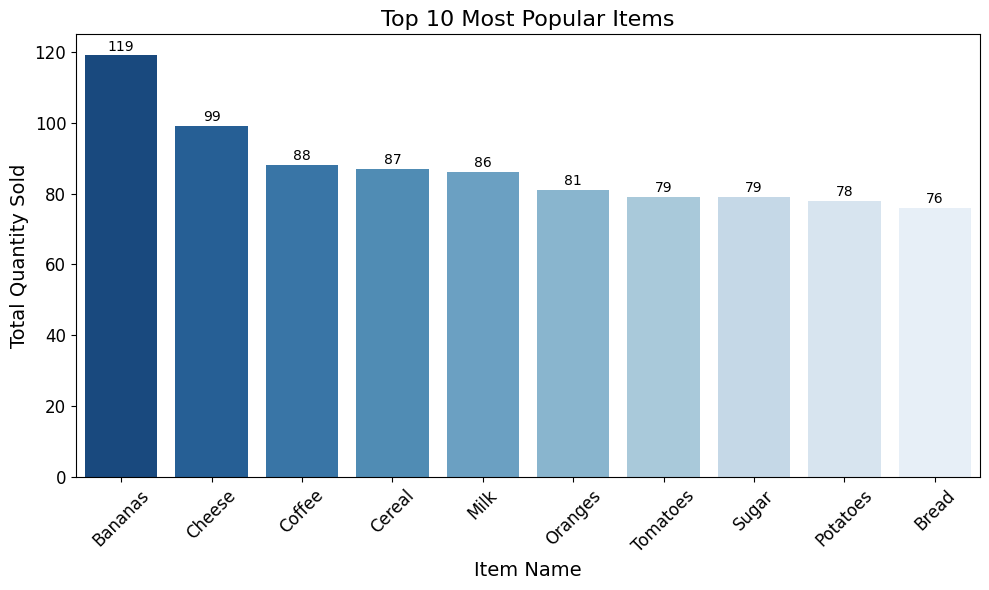

In [14]:
# Step 1: Calculate item popularity
item_popularity = data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

# Step 2: Select the top N items
top_n = 10
top_items = item_popularity.head(top_n)

# Step 3: Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette='Blues_r')

# Step 4: Add values on top of the bars
for i, value in enumerate(top_items.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Step 5: Customize the chart
plt.title(f'Top {top_n} Most Popular Items', fontsize=16)
plt.xlabel('Item Name', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Step 6: Show the chart
plt.tight_layout()
plt.show()

## So, bananas are the most popular items sold at the store. Now, let’s have a look at the customer behaviour:

In [15]:
# Calculate average quantity and spending per customer
customer_behavior = data.groupby('CustomerID').agg({'Quantity': 'mean', 'Price': 'sum'}).reset_index()

# Create a DataFrame to display the values
table_data = pd.DataFrame({
    'CustomerID': customer_behavior['CustomerID'],
    'Average Quantity': customer_behavior['Quantity'],
    'Total Spending': customer_behavior['Price']
})

# Create a subplot with a scatter plot and a table
fig = go.Figure()

# Add a scatter plot
fig.add_trace(go.Scatter(x=customer_behavior['Quantity'], y=customer_behavior['Price'],
                         mode='markers', text=customer_behavior['CustomerID'],
                         marker=dict(size=10, color='coral')))

# Add a table
fig.add_trace(go.Table(
    header=dict(values=['CustomerID', 'Average Quantity', 'Total Spending']),
    cells=dict(values=[table_data['CustomerID'], table_data['Average Quantity'], table_data['Total Spending']]),
))

# Update layout
fig.update_layout(title='Customer Behavior',
                  xaxis_title='Average Quantity', yaxis_title='Total Spending')

# Show the plot
fig.show()

Here, we are exploring customer behaviour, comparing average quantity and total spending, and analyzing exact numerical values in the table for each customer.
Now, let’s use the Apriori algorithm to create association rules. The Apriori algorithm is used to discover frequent item sets in large transactional datasets. It aims to identify items that are frequently purchased together in transactional data. It helps uncover patterns in customer behaviour, allowing businesses to make informed decisions about product placement, promotions, and marketing. Here’s how to implement Apriori to generate association rules:

In [16]:
!pip install --upgrade mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.


In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

# Group items by BillNo and create a list of items for each bill
basket = data.groupby('BillNo')['Itemname'].apply(list).reset_index()

# Encode items as binary variables using one-hot encoding
basket_encoded = basket['Itemname'].str.join('|').str.get_dummies('|').astype(bool)

# Find frequent itemsets using Apriori algorithm with lower support
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

# Calculate the number of itemsets (workaround for older mlxtend)
num_itemsets = len(frequent_itemsets)

# Generate association rules with lower lift threshold
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5, num_itemsets=num_itemsets)

# Display association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


  antecedents consequents   support  confidence      lift
0     (Bread)    (Apples)  0.045752    0.304348  1.862609
1    (Apples)     (Bread)  0.045752    0.280000  1.862609
2    (Butter)    (Apples)  0.026144    0.160000  0.979200
3    (Apples)    (Butter)  0.026144    0.160000  0.979200
4    (Cereal)    (Apples)  0.019608    0.096774  0.592258
5    (Apples)    (Cereal)  0.019608    0.120000  0.592258
6    (Cheese)    (Apples)  0.039216    0.214286  1.311429
7    (Apples)    (Cheese)  0.039216    0.240000  1.311429
8    (Apples)   (Chicken)  0.032680    0.200000  1.530000
9   (Chicken)    (Apples)  0.032680    0.250000  1.530000


## The above output shows association rules between different items (antecedents) and the items that tend to be purchased together with them (consequents). Let’s interpret the output step by step:

1. Antecedents: These are the items that are considered as the starting point or “if” part of the association rule. For example, Bread, Butter, Cereal, Cheese, and Chicken are the antecedents in this analysis.
2. Consequents: These are the items that tend to be purchased along with the antecedents or the “then” part of the association rule.
3. Support: Support measures how frequently a particular combination of items (both antecedents and consequents) appears in the dataset. It is essentially the proportion of transactions in which the items are bought together. For example, the first rule indicates that Bread and Apples are bought together in approximately 4.58% of all transactions.
4. Confidence: Confidence quantifies the likelihood of the consequent item being purchased when the antecedent item is already in the basket. In other words, it shows the probability of buying the consequent item when the antecedent item is bought. For example, the first rule tells us that there is a 30.43% chance of buying Apples when Bread is already in the basket.
5. Lift: Lift measures the degree of association between the antecedent and consequent items, while considering the baseline purchase probability of the consequent item. A lift value greater than 1 indicates a positive association, meaning that the items are more likely to be bought together than independently. A value less than 1 indicates a negative association. For example, the first rule has a lift of approximately 1.86, suggesting a positive association between Bread and Apples.